### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
D = 0.20          # initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 

phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [209]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

### Following the fluxogram

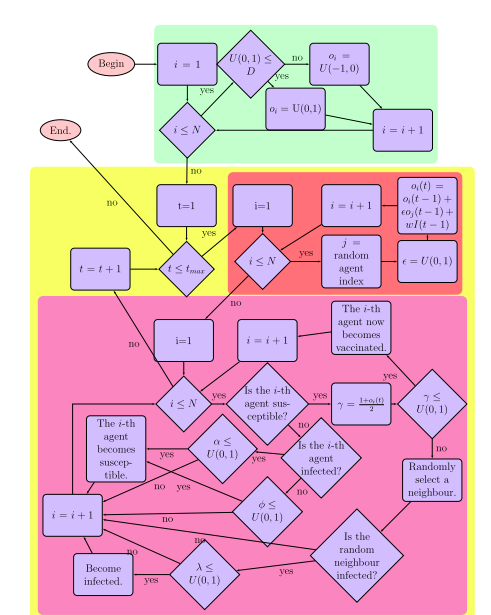

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

In [320]:

def simulate(lambda_value):
    global D, w, alpha, phi, N, mcs, time_series_infected, time_series_vaccinated, time_series_average_opinion
    
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    # random_indices = np.random.randint(0, N, 10)
    # for i in random_indices:
    #     infected[i] = 1
    #     susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                # elif np.random.uniform(0, 1) >= (1 - gamma[i]) * lambda_value * max(np.sum(infected), 1):
                #     infected[i] = 1
                #     susceptible[i] = 0
                #     print("Infection")
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                    print("Infection")
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_30455/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


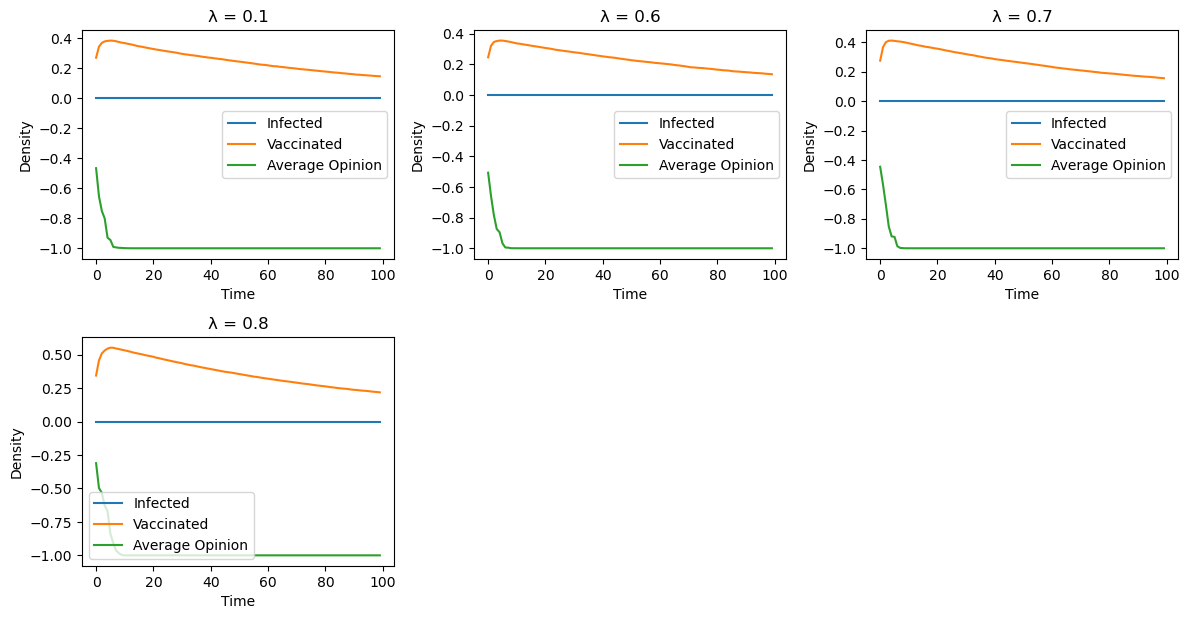

In [321]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


- Infection remains 0 as: <br>

> new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected) 

<br>

$I(t-1)$ calculated here is always 0. <br>
as $I$ is initialized as an array of 0s
<br><br>
and susceptible $\to$ infected never happens as:
 <br><br>

>elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value

<br>
this condition is never met as infected is always 0.


### S -> I (2nd definition)

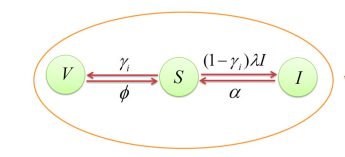

In [337]:

def simulate(lambda_value):
    global D, w, alpha, phi, N, mcs, time_series_infected, time_series_vaccinated, time_series_average_opinion
    
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) < D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) < gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) < (1 - gamma[i]) * lambda_value * np.sum(infected):
                    infected[i] = 1
                    susceptible[i] = 0
                # elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                #     infected[i] = 1
                #     susceptible[i] = 0
                #     print("Infection")
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) < alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) < phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_30455/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


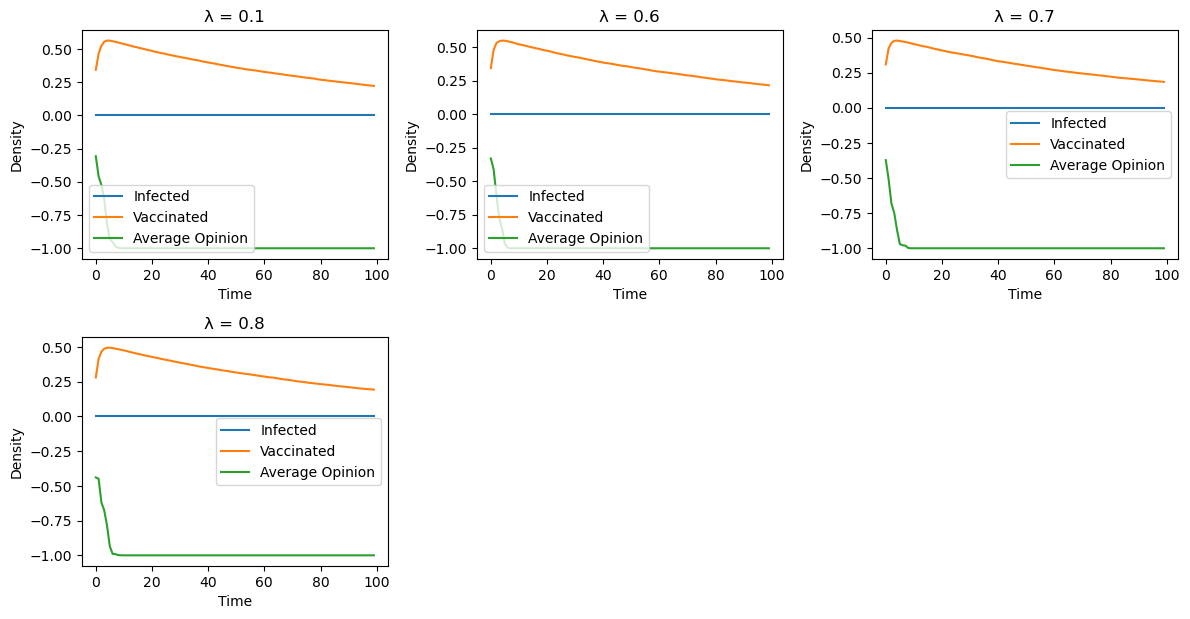

In [338]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


### Initializing some agents as infected at t = 0
> using fluxogram condition for susceptible to infected

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

In [7]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                    print("Infection")
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_13008/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


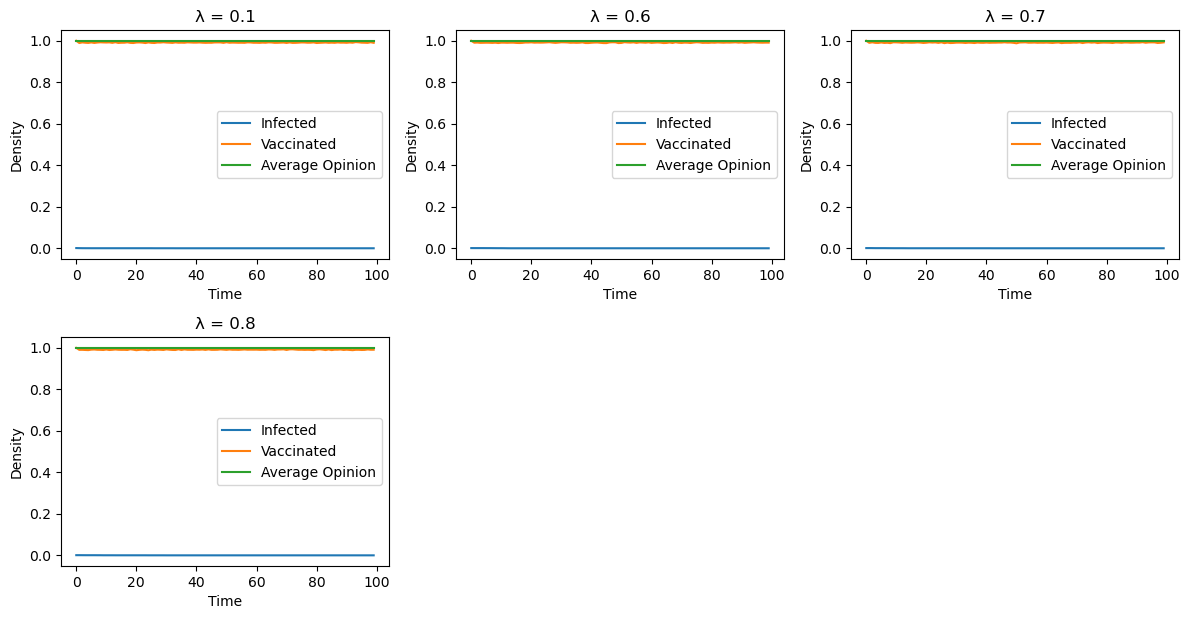

In [8]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


## Latest 

In [213]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    for k in range(0, mcs):
        # print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        # print("# of infected ", np.sum(infected))
        # print("# of vaccinated ", np.sum(vaccinated))
        # print("# of susceptible ", np.sum(susceptible))
        # print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion




/tmp/ipykernel_16270/405418415.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


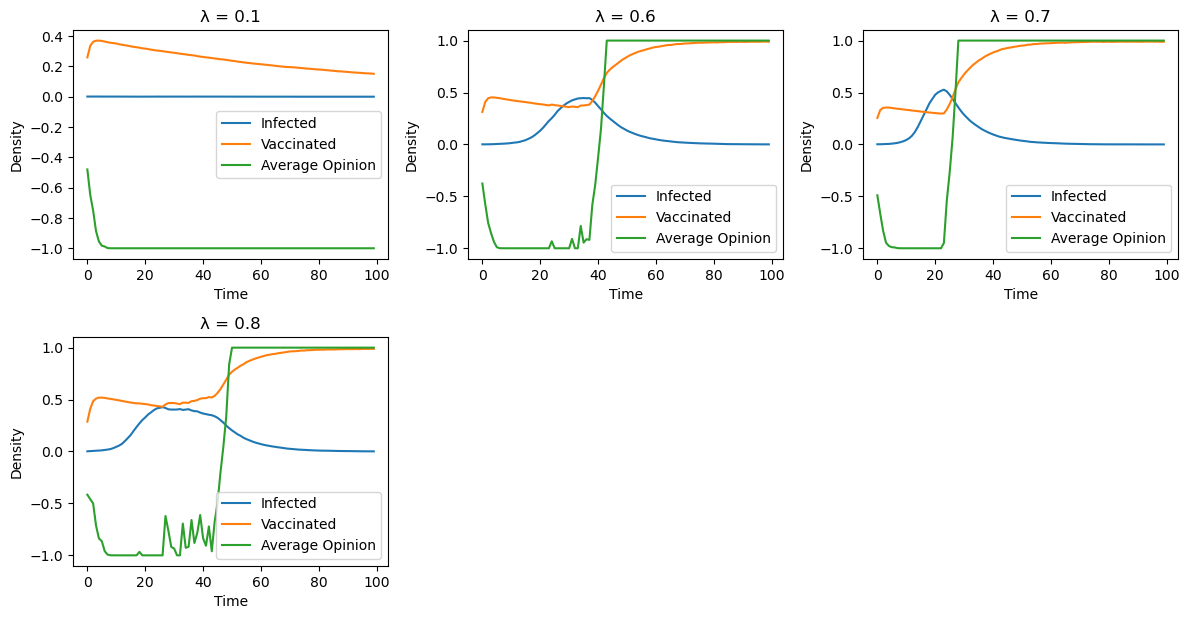

In [214]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()

## Fixing

In [226]:
opinions = np.zeros(N)
for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine
opinions

array([-0.21362568, -0.34004295,  0.17567862, ..., -0.46925554,
       -0.88032357, -0.63409458])

In [227]:
susceptible = np.ones(N)
susceptible

array([1., 1., 1., ..., 1., 1., 1.])

In [228]:
infected = np.zeros(N)
infected

array([0., 0., 0., ..., 0., 0., 0.])

In [229]:
random_indices = np.random.randint(0, N, 10)
random_indices

array([4759, 7862, 1053, 3935,  257, 1065, 5595, 2880, 8389, 3469])

In [230]:
for i in random_indices:
    infected[i] = 1
    susceptible[i] = 0

In [231]:
vaccinated = np.zeros(N)

In [232]:
time_series_infected = []
time_series_vaccinated = []
time_series_average_opinion = []

In [233]:
lambda_value = 0.6

In [234]:
for k in range(0, mcs):
        print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        print("# of infected ", np.sum(infected))
        print("# of vaccinated ", np.sum(vaccinated))
        print("# of susceptible ", np.sum(susceptible))
        print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)

mcs 
 0
# of infected  10.0
# of vaccinated  0.0
# of susceptible  9990.0




mcs 
 1
# of infected  11.0
# of vaccinated  2884.0
# of susceptible  7105.0


mcs 
 2
# of infected  12.0
# of vaccinated  3925.0
# of susceptible  6063.0


mcs 
 3
# of infected  19.0
# of vaccinated  4489.0
# of susceptible  5492.0


mcs 
 4
# of infected  26.0
# of vaccinated  4667.0
# of susceptible  5307.0


mcs 
 5
# of infected  31.0
# of vaccinated  4737.0
# of susceptible  5232.0


mcs 
 6
# of infected  38.0
# of vaccinated  4771.0
# of susceptible  5191.0


mcs 
 7
# of infected  42.0
# of vaccinated  4753.0
# of susceptible  5205.0


mcs 
 8
# of infected  65.0
# of vaccinated  4722.0
# of susceptible  5213.0


mcs 
 9
# of infected  82.0
# of vaccinated  4676.0
# of susceptible  5242.0


mcs 
 10
# of infected  105.0
# of vaccinated  4638.0
# of susceptible  5257.0


mcs 
 11
# of infected  144.0
# of vaccinated  4572.0
# of susceptible  5284.0


mcs 
 12
# of infected  177.0
# of vaccinated  4523.0
# of susceptible  5300.0


mcs 
 13
# of infected  238.0
# of vaccinated 

In [235]:
new_opinions

array([1., 1., 1., ..., 1., 1., 1.])

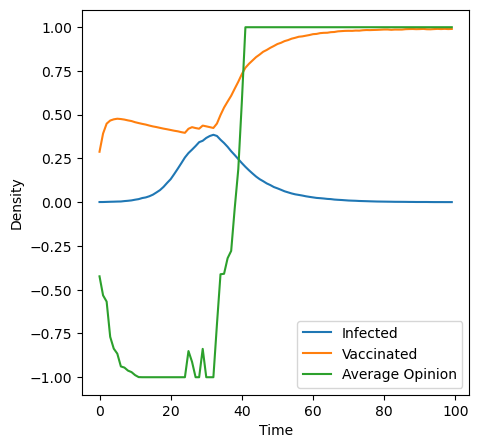

In [236]:
# plot the results
plt.figure(figsize=(5, 5))
plt.plot(time_series_infected, label='Infected')
plt.plot(time_series_vaccinated, label='Vaccinated')
plt.plot(time_series_average_opinion, label='Average Opinion')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()
